In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
games = pd.read_csv('steam_reviews.csv').drop(['date_posted','funny','helpful','hour_played','is_early_access_review','review'],axis = 1)
list_games = games['title'].unique()
games_recommendations = pd.get_dummies(games,columns = ['recommendation']).groupby('title').agg(['sum'])
games_recommendations


,recommendation_Not Recommended,recommendation_Recommended
,sum,sum
title,,
ACE COMBAT™ 7: SKIES UNKNOWN,0.0,10.0
ARK: Survival Evolved,162.0,33.0
ASTRONEER,88.0,2573.0
Battlefleet Gothic: Armada 2,2.0,8.0
Beat Saber,0.0,10.0
Cold Waters,0.0,10.0
Dead by Daylight,5105.0,17116.0
Divinity: Original Sin 2 - Definitive Edition,17.0,173.0


In [156]:
movies = pd.read_csv('movies.csv').drop(['genres'],axis = 1)
ratings_movies = pd.read_csv('ratings.csv').drop(['userId','timestamp'],axis = 1)
list_movies = movies['title'].unique()
movies_ratings_joined = pd.merge(ratings_movies, movies, on='movieId', how='outer')

cant_movies = len(list_movies)
cant_movie_rated = len(movies_ratings_joined.groupby('movieId')['movieId'].unique())

movies_ratings = pd.get_dummies(movies_ratings_joined, columns = ['rating']).groupby('movieId').agg(['sum'])
movies_ratings



,title,rating_0.5,rating_1.0,rating_1.5,rating_2.0,rating_2.5,rating_3.0,rating_3.5,rating_4.0,rating_4.5,rating_5.0
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
movieId,,,,,,,,,,,
1,Toy Story (1995)Toy Story (1995)Toy Story (199...,1,0,1,6,8,34,18,82,18,47
2,Jumanji (1995)Jumanji (1995)Jumanji (1995)Juma...,1,1,2,5,12,28,11,36,7,7
3,Grumpier Old Men (1995)Grumpier Old Men (1995)...,1,3,1,2,2,20,5,12,0,6
4,Waiting to Exhale (1995)Waiting to Exhale (199...,0,1,1,1,0,4,0,0,0,0
5,Father of the Bride Part II (1995)Father of th...,1,0,2,6,2,25,1,8,1,3
...,...,...,...,...,...,...,...,...,...,...,...
193581,Black Butler: Book of the Atlantic (2017),0,0,0,0,0,0,0,1,0,0
193583,No Game No Life: Zero (2017),0,0,0,0,0,0,1,0,0,0


In [184]:
print('Cantidad de peliculas totales: ', cant_movies) 
print('Cantidad de peliculas evaluadas: ', cant_movie_rated)

Cantidad de peliculas totales:  9737
Cantidad de peliculas evaluadas:  9742


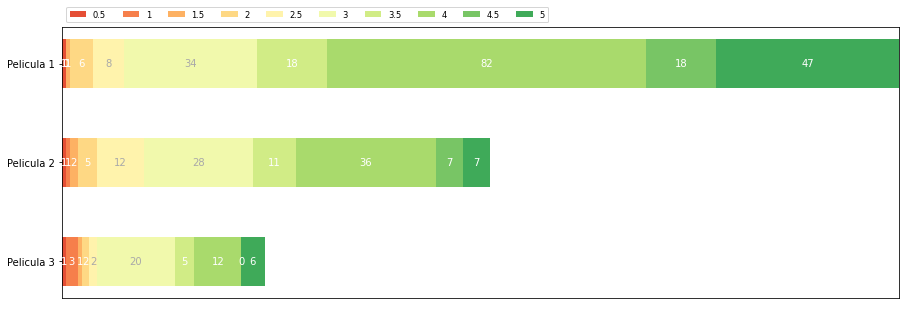

In [193]:
category_names = ['0.5','1','1.5','2','2.5','3','3.5','4','4.5','5']
results = {
    'Pelicula 1': list(movies_ratings.iloc[0])[1::],
    'Pelicula 2': list(movies_ratings.iloc[1])[1::],
    'Pelicula 3': list(movies_ratings.iloc[2])[1::],
}

def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(15, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, label_type='center', color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')

    return fig, ax


survey(results, category_names)
plt.show()

source code: https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py